<a href="https://colab.research.google.com/github/school-shenanigans/Assignment-2/blob/master/PCAAssignmentTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd #used for manipulating data (READ and WRITE)
import math
import numpy as np
from numpy import array
from sklearn.decomposition import PCA #skitlearn can be used to implement regression, nureal networks etc. In this case we'll use it to decompose a matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [0]:
data = pd.read_csv("train_data.csv")
# data.info()

In [0]:
nominal = ["MSZoning", "LandContour","Utilities" , "Neighborhood", "BldgType","LotConfig" , "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Foundation", "Heating", "CentralAir", "Electrical", "GarageType", "MiscFeature", "SaleType"]
ordinal = ["Street","Alley","LotShape","LandSlope", "Condition1", "Condition2", "HouseStyle",  "MasVnrType", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "SaleCondition"]
numerical = ["MSSubClass","MoSold", "LotFrontage", "LotArea", "YearBuilt", "YearRemodAdd","OverallQual","BsmtFullBath", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr","TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "YrSold"]
target = ['SalePrice']

In [0]:
# Drop columns with more than 200 "NA" entries
# data.dropna(axis = 1, thresh = 200, inplace = True)
data.replace({"NA": np.nan}, inplace = True)
cleaned_data = data.fillna(0)

In [0]:
categorical_data = cleaned_data.select_dtypes(include = ['object']).copy()
column_names = list(categorical_data.columns)

for feature in column_names:
  categorical_data[feature] = categorical_data[feature].astype('category')

for feature in ordinal:
  categorical_data[feature] = categorical_data[feature].cat.codes  

# categorical_data.head()

In [0]:
data_copy = categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]), data_copy], axis=1)
data_copy.drop(nominal, axis=1, inplace = True)

new_data = pd.concat([data_copy, cleaned_data[numerical], cleaned_data[target]], axis = 1)


In [0]:
# Another way of converting a dataframe to a matrix
all_features = list(new_data.columns)
all_features
X = new_data.loc[:,all_features].values
y = new_data.loc[:, ['SalePrice']].values
X

In [0]:
# Standardising the dataset
X = StandardScaler().fit_transform(X)
X

In [0]:
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns = ['PC_1', 'PC_2'])
final_data = pd.concat([pca_data, cleaned_data[target]], axis=1)
final_data

In [15]:
# percentage of information carried by the above 2 Principal Component 
pca.explained_variance_ratio_

array([0.07191341, 0.03672562])

In [0]:
X = final_data.drop("SalePrice", 1)
y = final_data["SalePrice"]
print(X)
print(y)
regressor = LassoCV()
regressor.fit(X,y)

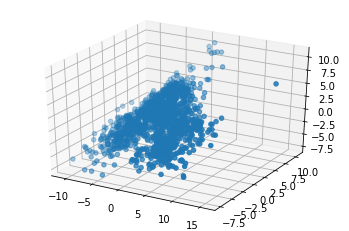

In [40]:
x = X.PC_1
y = X.PC_2
z = y.values

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,y,z)